<h1 align="center">S&P 500 Stock Price Analysis (2014-2017)<h1>

## Introduction

The S&P 500 is one of the most widely followed stock market indices, representing the performance of 500 leading publicly traded companies in the United States. Analyzing its historical stock price data helps in understanding market trends, price behaviour, and risk patterns over time. This project focuses on the analysis of S&P 500 stock prices from 2014-2017 using Python-based data analytics techniques.

The objective of this study is to examine overall market movement, identify high-performing and volatile stocks, and analyze yearly performance trends. By applying data cleaning,feature engineering, and exploratory data analysis (EDA) techniques, the project aims to derive meaningful insights that can support basic investment decision-making and financial understanding.


## Data Source

The dataset used in this project was obtained from the **Maven Analytics** website, a trusted platform that provides high-quality datasets for data analytics and business intelligence practice. The dataset contains historical daily stock price records of companies listed in the S&P 500 index covering the period from 2014-2017.

Maven Analytics offers this dataset as a part of its publicly available learning resources, making it suitable for analytical, educational, and portfolio-building purposes.

## About the Dataset

The dataset contains historical daily stock price records of companies listed in the S&P 500 index from 2014-2017. Each record represents a single trading day for a specific company and includes essential financial attributes such as stock symbol, trading date, opening price, highest price, lowest price, closing price, and trading volume.

The dataset provides a comprehensive view of stock price movements and trading activity across multiple companies, making it suitable for analyzing market trends, volatility patterns, and overall performance within the S&P 500 index.

## Objective of the Project

The primary objective of this project is to analyze historical stock price data of S&P 500 companies from 2014 to 2017 to understand overall market trends, identify high-performing and volatile stocks, and examine year-wise performance patterns.

The project aims to apply data cleaning, feature engineering, and exploratory data analysis techniques to derive meaningful insights that can support basic investment decision-making and enhance financial data analysis skills.

## What will be done in this project

In this project, historical stock price data of S&P 500 companies from 2014-2017 will be systematically analyzed to understand market behaviour and stock performance. The project will begin with data loading and preprocessing, including handling missing values, removing duplicates, converting data formats, and creating new analytical features such as daily returns and moving averages.

Exploratory Data Analysis (EDA) and visualizations will be performed to study overall market trends, year-wise performance, most traded stocks, and volatility levels. Based on these analyses, key insights will be derived to identify high-performing stocks and risk patterns The final output of the project will be a set of summarized findings that provide a clear understanding of stock market movements during the selected period.

### Data Loading and Initial Overview

This stage focuses on importing the S&P 500 stock price dataset and performing an initial inspection to understand its structure and key characteristics. The dataset is loaded into the analysis environment using Python libraries and basic exploratory functions are applied to examine the number of records, column names, data types, and summary statistics.

The initial overview helps in identifying missing values, incorrect data types, and overall data distribution, which provides a foundation for further data cleaning, preprocessing, and detailed analysis.

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load the dataset
df=pd.read_csv(r"C:\Users\HP\Downloads\S&P_500_Stock_Prices_2014-2017.csv.zip")
df


,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...,...
497467,XYL,2017-12-29,68.5300,68.8000,67.9200,68.2000,1046677
497468,YUM,2017-12-29,82.6400,82.7100,81.5900,81.6100,1347613
497469,ZBH,2017-12-29,121.7500,121.9500,120.6200,120.6700,1023624
497470,ZION,2017-12-29,51.2800,51.5500,50.8100,50.8300,1261916


In [3]:
#Display first and last records
df.head()
df.tail()

,symbol,date,open,high,low,close,volume
497467,XYL,2017-12-29,68.53,68.80,67.92,68.20,1046677
497468,YUM,2017-12-29,82.64,82.71,81.59,81.61,1347613
497469,ZBH,2017-12-29,121.75,121.95,120.62,120.67,1023624
497470,ZION,2017-12-29,51.28,51.55,50.81,50.83,1261916
497471,ZTS,2017-12-29,72.55,72.76,72.04,72.04,1704122


In [4]:
#Dataset Shape - shows the number or rows and columns
df.shape

#Column Information and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [5]:
#Summary Statistics - Gives min, max,mean, standard deviation, quartiles of numeric columns
df.describe()

,open,high,low,close,volume
count,497461.000000,497464.000000,497464.000000,497472.000000,4.974720e+05
mean,86.352275,87.132562,85.552467,86.369082,4.253611e+06
std,101.471228,102.312062,100.570957,101.472407,8.232139e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,41.690000,42.090000,41.280000,41.703750,1.080166e+06
50%,64.970000,65.560000,64.353700,64.980000,2.084896e+06
75%,98.410000,99.230000,97.580000,98.420000,4.271928e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


### Data Cleaning and Pre-Processing

This stage focuses on preparing the raw S&P 500 stock price data for accurate and reliable analysis. It involves handling missing values,removing duplicate and invalid records, converting data types, and sorting the dataset to maintain proper time order.

Additional features such as year, month, daily returns, and moving averages are created to enhance analytical depth. These preprocessing steps ensure that the dataset is consistent, clean, and structured, providing a strong foundation for exploratory data analysis and meaningful insight generation.

In [6]:
#Convert Date column to Datetime
df['date']=pd.to_datetime(df['date'])

In [7]:
#Check Duplicate Records
df.duplicated().sum()

np.int64(0)

In [8]:
#Check missing values
df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [9]:
#Fill missing prices with forward fill(market realistic)
df[['open','high','low']]=df[['open','high','low']].fillna(method='ffill')


C:\Users\HP\AppData\Local\Temp\ipykernel_17656\2744739459.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['open','high','low']]=df[['open','high','low']].fillna(method='ffill')


In [10]:
#Verify no missing values
df.isnull().sum()

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

In [11]:
#Sort Data by Symbol and Date
df=df.sort_values(['symbol','date'])

In [12]:
#Remove Invalid Price Rows
df=df[(df['open']>0)&(df['high']>0)&(df['low']>0)&(df['close']>0)]

In [13]:
#Create Year and Month Features
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month

In [14]:
#Daily Return Column (for volatility & risk)
df['daily_return']=df.groupby('symbol')['close'].pct_change()

In [15]:
#Moving Averages
df['MA_50']=df.groupby('symbol')['close'].transform(lambda x:x.rolling(50).mean())
df['MA_200']=df.groupby('symbol')['close'].transform(lambda x:x.rolling(200).mean())

In [16]:
#Clean Final Dataset Check
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497472 entries, 57 to 497471
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   symbol        497472 non-null  object        
 1   date          497472 non-null  datetime64[ns]
 2   open          497472 non-null  float64       
 3   high          497472 non-null  float64       
 4   low           497472 non-null  float64       
 5   close         497472 non-null  float64       
 6   volume        497472 non-null  int64         
 7   year          497472 non-null  int32         
 8   month         497472 non-null  int32         
 9   daily_return  496967 non-null  float64       
 10  MA_50         472758 non-null  float64       
 11  MA_200        397439 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int32(2), int64(1), object(1)
memory usage: 45.5+ MB


### EDA & Visualization

This stage focuses on exploring the cleaned S&P 500 stock price dataset to uncover patterns, trends, and relationships within the data. Through statistical analysis and visualizations, the project examines overall market behaviour, year-wise performance, trading volume distribution, volatility levels, and moving average trends of selected stocks.

Visual tools such as line charts, bar charts, histograms, and correlation plots are used to present insights in an easy-to-understand format. This step plays a crucial role in identifying meaningful patterns that support informed interpretation and analysis of stock market performance.


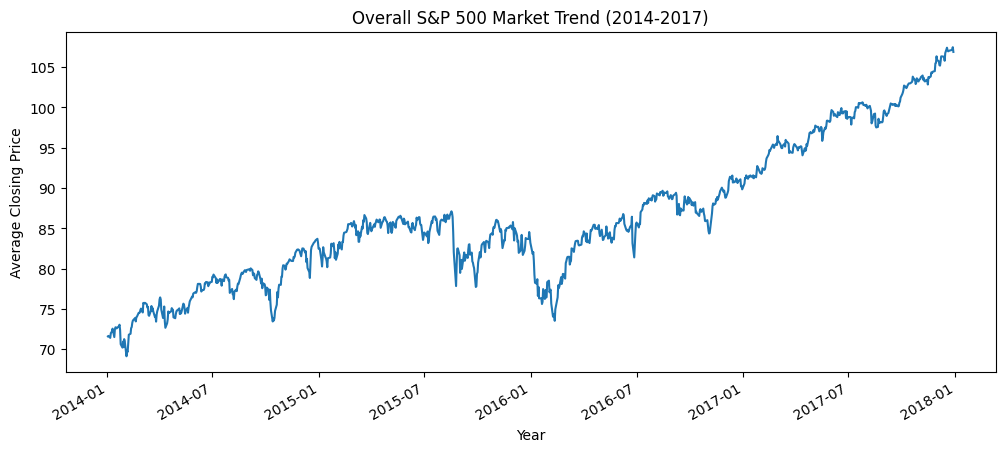

In [17]:
#Overall Market Trend(S&P 500 Index Average)

market_trend=df.groupby('date')['close'].mean()

plt.figure(figsize=(12,5))
market_trend.plot()
plt.title("Overall S&P 500 Market Trend (2014-2017)")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.show()

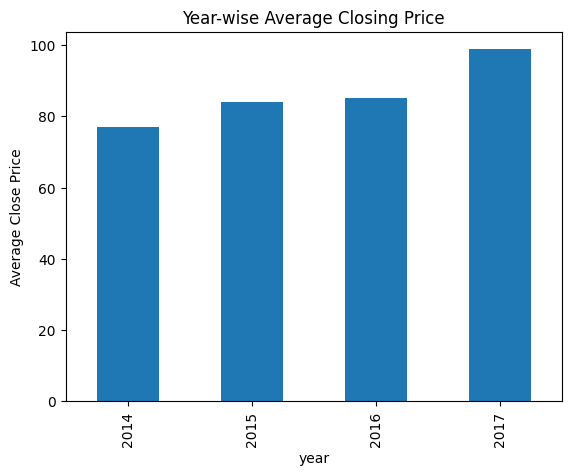

In [18]:
#Year-wise Market Performance

yearly_avg=df.groupby('year')['close'].mean()
yearly_avg.plot(kind='bar')
plt.title("Year-wise Average Closing Price")
plt.ylabel("Average Close Price")
plt.show()

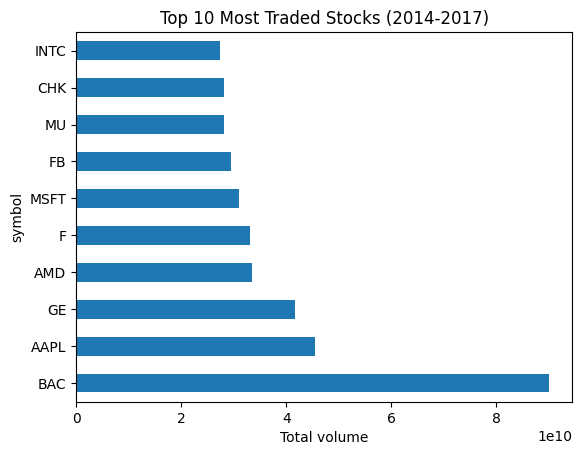

In [19]:
#Top 10 Most Traded Stocks

top_volume=df.groupby('symbol')['volume'].sum().sort_values(ascending=False).head(10)
top_volume.plot(kind='barh')
plt.title("Top 10 Most Traded Stocks (2014-2017)")
plt.xlabel("Total volume")
plt.show()

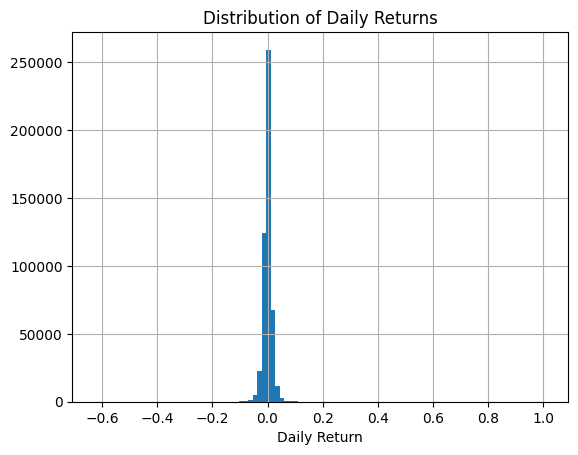

In [20]:
# Daily Return Distribution

df['daily_return'].hist(bins=100)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.show()

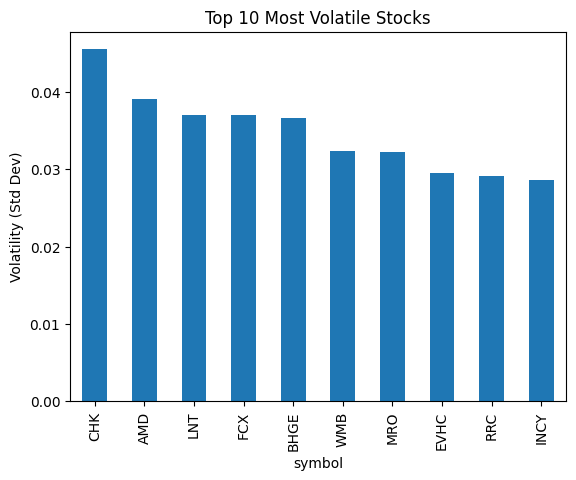

In [21]:
# Volatility Comparison (Top 10)

volatility=df.groupby('symbol')['daily_return'].std().sort_values(ascending=False).head(10)
volatility.plot(kind='bar')
plt.title("Top 10 Most Volatile Stocks")
plt.ylabel("Volatility (Std Dev)")
plt.show()

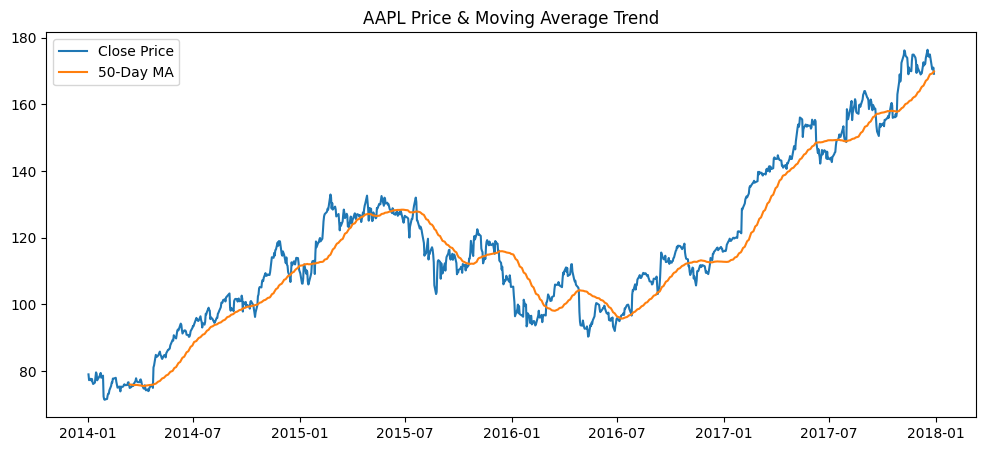

In [23]:
#Moving Average Trend (Sample Stock)

sample=df[df['symbol']=='AAPL']
plt.figure(figsize=(12,5))
plt.plot(sample['date'],sample['close'],label='Close Price')
plt.plot(sample['date'],sample['MA_50'],label="50-Day MA")
plt.legend()
plt.title("AAPL Price & Moving Average Trend")
plt.show()

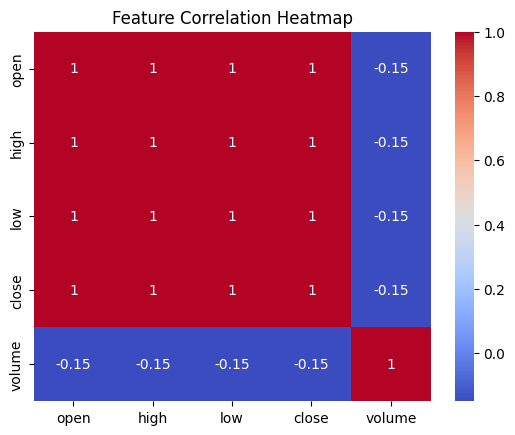

In [22]:
#Correlation Heatmap

import seaborn as sns
sns.heatmap(df[['open','high','low','close','volume']].corr()
,annot=True,cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Key Findings and Analytical Reports

• The overall S&P 500 market shows a consistent upward trend from 2014-2017, indicating steady market growth during the selected period.

• Among all years, 2017 recorded the highest average closing prices, reflecting strong market performance and increased investor confidence.

• Technology-related stocks dominated trading volumes, showing higher investor activity and market participation in the technology sector.

• Several stocks exhibited high volatility, highlighting increased risk and frequent price fluctuations compared to other companies.

• A strong positive correlation exists between opening, high, low, and closing prices, confirming stable price movement patterns across stocks.

• Moving average analysis revealed that many stocks followed long-term upward trends, supporting the overall bullish market behavior.

These findings provide a clear understanding of stock market behavior, performance trends, and risk patterns within the S&P 500 index from 2014 to 2017, offering valuable insights for basic investment analysis and financial decision support.


## Conclusion

This project successfully analyzed historical stock price data of S&P 500 companies from 2014 to 2017 to understand market behavior, performance trends, and volatility patterns. Through data cleaning, preprocessing, and exploratory data analysis, meaningful insightswere derived regarding year-wise market performance, trading volume distribution, and risk levels across different stocks.

The analysis revealed a strong upward market trend, particularly in 2017, along with the dominance of technology stocks in trading activity and noticeable volatility in certain companies. These findings highlight how historical stock data can be effectively used to evaluate market conditions and support basic investment-related decision-making. Overall, the project demonstrates the practical application of data analytics techniques in financial market analysis and strengthens analytical and visualization skills for real-world business scenarios.
